In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('/home/msilvafe/Downloads/K2SO_Sweep2/1589261755_tune.npy',allow_pickle = True).item()

In [3]:
data.keys()

dict_keys([0, 1, 2, 3])

In [8]:
data[3]['resonances'][0].keys()

dict_keys(['freq', 'eta', 'eta_scaled', 'eta_phase', 'r2', 'eta_mag', 'latency', 'Q', 'freq_eta_scan', 'resp_eta_scan', 'subband', 'channel', 'offset'])

In [30]:
freq= data[3]['resonances'][10]['freq_eta_scan']
resp= data[3]['resonances'][10]['resp_eta_scan']

0.01597644616964822


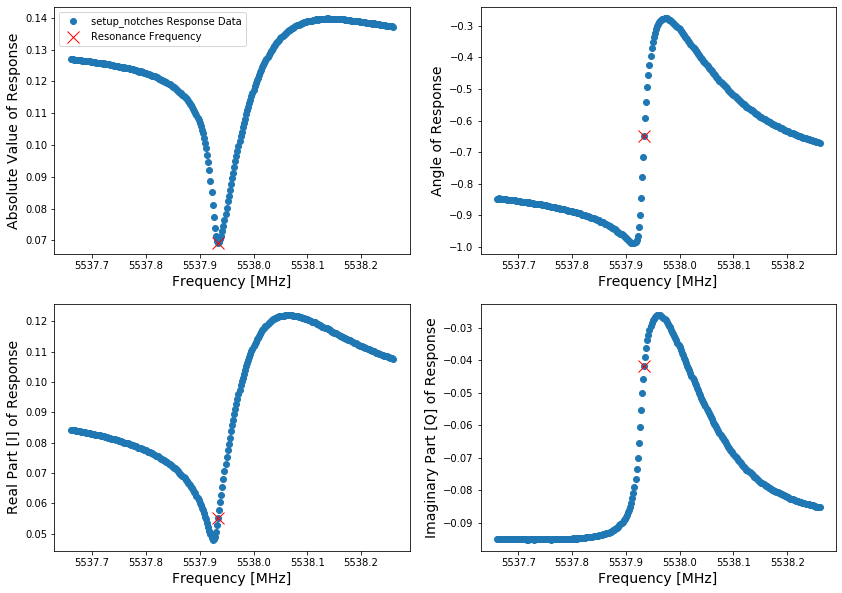

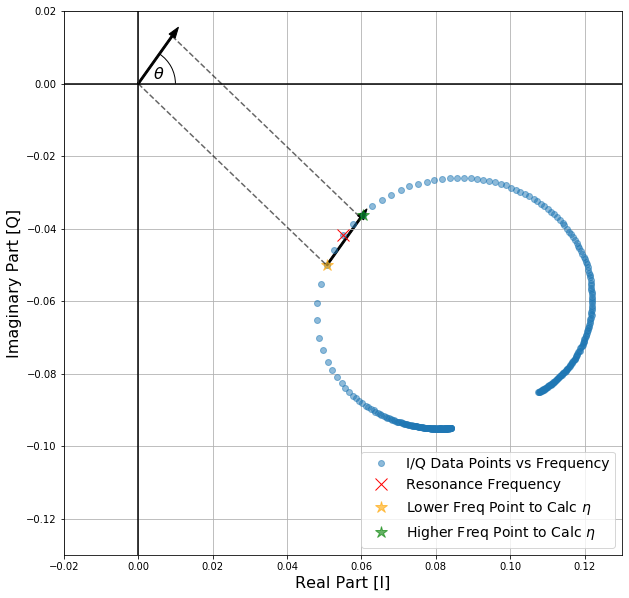

In [132]:
from matplotlib import patches
fr_idx = np.argmin(np.abs(resp))
low_idx = fr_idx - 2
up_idx = fr_idx + 2
eta_0 = [np.real(resp[low_idx]),np.imag(resp[low_idx])]
eta_f = [np.real(resp[up_idx]),np.imag(resp[up_idx])]
head_length = 0.001
dx = eta_f[0]-eta_0[0]
dy = eta_f[1]-eta_0[1]
vec_ab = [dx,dy]
vec_ab_magnitude = np.sqrt(dx**2+dy**2)
dx = dx / vec_ab_magnitude
dy = dy / vec_ab_magnitude
vec_ab_magnitude = vec_ab_magnitude - head_length

print(vec_ab_magnitude)


plt.figure(figsize = (14,10))
plt.subplot(221)
plt.plot(freq,np.abs(resp),'o')
plt.plot(freq[fr_idx],np.abs(resp[fr_idx]),'rx',markersize = 12)
plt.xlabel('Frequency [MHz]',fontsize = 14)
plt.ylabel('Absolute Value of Response', fontsize = 14)
plt.legend(['setup_notches Response Data','Resonance Frequency'],loc = 'upper left')
plt.subplot(222)
plt.plot(freq,np.angle(resp),'o')
plt.plot(freq[fr_idx],np.angle(resp[fr_idx]),'rx',markersize = 12)
plt.xlabel('Frequency [MHz]',fontsize = 14)
plt.ylabel('Angle of Response', fontsize = 14)
plt.subplot(223)
plt.plot(freq,np.real(resp),'o')
plt.plot(freq[fr_idx],np.real(resp[fr_idx]),'rx',markersize = 12)
plt.xlabel('Frequency [MHz]',fontsize = 14)
plt.ylabel('Real Part [I] of Response', fontsize = 14)
plt.subplot(224)
plt.plot(freq,np.imag(resp),'o')
plt.plot(freq[fr_idx],np.imag(resp[fr_idx]),'rx',markersize = 12)
plt.xlabel('Frequency [MHz]',fontsize = 14)
plt.ylabel('Imaginary Part [Q] of Response', fontsize = 14)

plt.figure(figsize = (10,10))
plt.plot(np.real(resp),np.imag(resp),'o',alpha = 0.5)
plt.plot(np.real(resp[fr_idx]),np.imag(resp[fr_idx]),'rx',markersize = 12)
plt.plot(np.real(resp[low_idx]),np.imag(resp[low_idx]),'*',color = 'orange', markersize = 12,alpha = 0.6)
plt.plot(np.real(resp[up_idx]),np.imag(resp[up_idx]),'*',color = 'green', markersize = 12,alpha = 0.6)

ax = plt.gca()
ax.arrow(eta_0[0],eta_0[1],vec_ab_magnitude*dx,vec_ab_magnitude*dy,head_width = 0.002,width = 0.0005,fc = 'black',ec='black')
ax.arrow(0,0,vec_ab_magnitude*dx,vec_ab_magnitude*dy,head_width = 0.002,width = 0.0005,fc = 'black',ec='black')
plt.plot([0,eta_0[0]],[0,eta_0[1]],'k--',alpha = 0.6)
plt.plot([0+vec_ab_magnitude*dx,eta_0[0]+vec_ab_magnitude*dx],[0+vec_ab_magnitude*dy,eta_0[1]+vec_ab_magnitude*dy],'k--',alpha = 0.6)
ax.axvline(x=0,color = 'black')
plt.axhline(y = 0, color = 'black')
e1 = patches.Arc((0,0),0.02,0.02,theta1 = 0.0, theta2 = np.arctan(dy/dx)*180/np.pi)
ax.add_patch(e1)
ax.annotate(r'$\theta$',xy = (0.16,0.875),xycoords='axes fraction',fontsize = 16)
#ax.annotate('Mag',xy = (0.16,0.875),xycoords='axes fraction',fontsize = 16)
plt.grid()
plt.xlim(-0.02,0.13)
plt.ylim(-0.13,0.02)
plt.xlabel('Real Part [I]',fontsize = 16)
plt.ylabel('Imaginary Part [Q]',fontsize = 16)
plt.legend(['I/Q Data Points vs Frequency','Resonance Frequency','Lower Freq Point to Calc $\eta$','Higher Freq Point to Calc $\eta$'],fontsize = 14,loc = 'lower right')